In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from itertools import combinations

import tensorflow as tf
tf.keras.backend.clear_session()

In [51]:
def split_data(perc_train, fingerprint_dataset):
    """
        Takes as input the percentage of fingerprints for training and
        the fingerprint dataset ordered chronologically.
        Returns the training and the test sequence
    """
    index_split = int(len(fingerprint_dataset) * perc_train)
    # train, test
    return fingerprint_dataset[: index_split], fingerprint_dataset[index_split:]


In [52]:
dfX = pd.read_csv("dataXorig.csv")
dfy = pd.read_csv("datayorig.csv")
dfX = dfX.drop(['Unnamed: 0'], axis = 1)
dfy = dfy.drop(['Unnamed: 0'], axis = 1)

In [53]:
X = dfX.values
y = dfy.values

In [54]:
dfX.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,9.666667,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.000000,3.0
1,1.0,15.541667,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0
2,1.0,22.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.972222,2.0
3,1.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.0
4,1.0,0.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.0


In [55]:
X_train, X_test = split_data(0.4, X)
y_train, y_test = split_data(0.4, y)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.40)

In [57]:
# create scaler from training data
scaler = StandardScaler().fit(X_train)

# apply same scaler to both train and test data
# this steps produces numpy matrices
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
def accuracy(preds, actual):
    return ((preds == actual) * 1).sum() / len(actual)

In [177]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, activation = 'relu',
                               kernel_initializer='random_normal',
                               bias_initializer='random_normal',
                               kernel_regularizer = tf.keras.regularizers.l1(0)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(100, activation = 'relu',
                               kernel_initializer='random_normal',
                               bias_initializer='random_normal',
                               kernel_regularizer = tf.keras.regularizers.l1(0)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(lr = 0.0001)

# lrreduce = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor="val_loss",
#     factor=0.7,
#     patience=30,
#     verbose=0,
#     mode="auto",
#     min_delta=0.0001,
#     cooldown=0,
#     min_lr=0,
# )
# es = tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0,
#     patience=400,
#     verbose=0,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=True,
# )

model.compile(optimizer = optimizer,
              loss = loss_fn,
              metrics = ["accuracy"])

history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 400)

Train on 2444 samples, validate on 611 samples
Epoch 1/400
2444/2444 [==============================] - 1s 526us/sample - loss: 0.2005 - accuracy: 0.9268 - val_loss: 0.5806 - val_accuracy: 0.9885
Epoch 2/400
2444/2444 [==============================] - 0s 83us/sample - loss: 0.0594 - accuracy: 0.9853 - val_loss: 0.4350 - val_accuracy: 0.9885
Epoch 3/400
2444/2444 [==============================] - 0s 78us/sample - loss: 0.0535 - accuracy: 0.9824 - val_loss: 0.2602 - val_accuracy: 0.9902
Epoch 4/400
2444/2444 [==============================] - 0s 79us/sample - loss: 0.0435 - accuracy: 0.9836 - val_loss: 0.1282 - val_accuracy: 0.9902
Epoch 5/400
2444/2444 [==============================] - 0s 83us/sample - loss: 0.0358 - accuracy: 0.9877 - val_loss: 0.0608 - val_accuracy: 0.9918
Epoch 6/400
2444/2444 [==============================] - 0s 82us/sample - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.0341 - val_accuracy: 0.9918
Epoch 7/400
2444/2444 [==============================] - 0s 81us

Epoch 56/400
2444/2444 [==============================] - 0s 81us/sample - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0128 - val_accuracy: 0.9967
Epoch 57/400
2444/2444 [==============================] - 0s 83us/sample - loss: 0.0072 - accuracy: 0.9980 - val_loss: 0.0112 - val_accuracy: 0.9967
Epoch 58/400
2444/2444 [==============================] - 0s 83us/sample - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.0105 - val_accuracy: 0.9967
Epoch 59/400
2444/2444 [==============================] - 0s 79us/sample - loss: 0.0074 - accuracy: 0.9984 - val_loss: 0.0098 - val_accuracy: 0.9967
Epoch 60/400
2444/2444 [==============================] - 0s 77us/sample - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0101 - val_accuracy: 0.9967
Epoch 61/400
2444/2444 [==============================] - 0s 79us/sample - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.0126 - val_accuracy: 0.9967
Epoch 62/400
2444/2444 [==============================] - 0s 84us/sample - loss: 0.0063 - accuracy: 0.9988

Epoch 111/400
2444/2444 [==============================] - 0s 77us/sample - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.0083 - val_accuracy: 0.9951
Epoch 112/400
2444/2444 [==============================] - 0s 80us/sample - loss: 0.0041 - accuracy: 0.9996 - val_loss: 0.0082 - val_accuracy: 0.9967
Epoch 113/400
2444/2444 [==============================] - 0s 81us/sample - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0063 - val_accuracy: 0.9967
Epoch 114/400
2444/2444 [==============================] - 0s 79us/sample - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0055 - val_accuracy: 0.9984
Epoch 115/400
2444/2444 [==============================] - 0s 81us/sample - loss: 0.0059 - accuracy: 0.9975 - val_loss: 0.0067 - val_accuracy: 0.9967
Epoch 116/400
2444/2444 [==============================] - 0s 82us/sample - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0050 - val_accuracy: 0.9984
Epoch 117/400
2444/2444 [==============================] - 0s 80us/sample - loss: 0.0021 - accuracy:

2444/2444 [==============================] - 0s 80us/sample - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0048 - val_accuracy: 0.9984
Epoch 166/400
2444/2444 [==============================] - 0s 77us/sample - loss: 0.0034 - accuracy: 0.9996 - val_loss: 0.0032 - val_accuracy: 0.9984
Epoch 167/400
2444/2444 [==============================] - 0s 77us/sample - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0031 - val_accuracy: 0.9984
Epoch 168/400
2444/2444 [==============================] - 0s 72us/sample - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 169/400
2444/2444 [==============================] - 0s 83us/sample - loss: 0.0038 - accuracy: 0.9996 - val_loss: 0.0050 - val_accuracy: 0.9967
Epoch 170/400
2444/2444 [==============================] - 0s 88us/sample - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0063 - val_accuracy: 0.9967
Epoch 171/400
2444/2444 [==============================] - 0s 77us/sample - loss: 0.0034 - accuracy: 0.9996 - val_

Epoch 220/400
2444/2444 [==============================] - 0s 78us/sample - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0030 - val_accuracy: 0.9984
Epoch 221/400
2444/2444 [==============================] - 0s 78us/sample - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 222/400
2444/2444 [==============================] - 0s 81us/sample - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0023 - val_accuracy: 0.9984
Epoch 223/400
2444/2444 [==============================] - 0s 81us/sample - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0025 - val_accuracy: 0.9984
Epoch 224/400
2444/2444 [==============================] - 0s 84us/sample - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 225/400
2444/2444 [==============================] - 0s 81us/sample - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 226/400
2444/2444 [==============================] - 0s 78us/sample - loss: 0.0040 - accuracy:

2444/2444 [==============================] - 0s 79us/sample - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0050 - val_accuracy: 0.9984
Epoch 275/400
2444/2444 [==============================] - 0s 84us/sample - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0033 - val_accuracy: 0.9984
Epoch 276/400
2444/2444 [==============================] - 0s 90us/sample - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9984
Epoch 277/400
2444/2444 [==============================] - 0s 82us/sample - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0036 - val_accuracy: 0.9984
Epoch 278/400
2444/2444 [==============================] - 0s 79us/sample - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0043 - val_accuracy: 0.9984
Epoch 279/400
2444/2444 [==============================] - 0s 90us/sample - loss: 0.0031 - accuracy: 0.9988 - val_loss: 0.0024 - val_accuracy: 0.9984
Epoch 280/400
2444/2444 [==============================] - 0s 86us/sample - loss: 0.0027 - accuracy: 0.9996 - val_

2444/2444 [==============================] - 0s 79us/sample - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 329/400
2444/2444 [==============================] - 0s 77us/sample - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 330/400
2444/2444 [==============================] - 0s 77us/sample - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0025 - val_accuracy: 0.9984
Epoch 331/400
2444/2444 [==============================] - 0s 79us/sample - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 0.9984
Epoch 332/400
2444/2444 [==============================] - 0s 74us/sample - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0030 - val_accuracy: 0.9984
Epoch 333/400
2444/2444 [==============================] - 0s 79us/sample - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0035 - val_accuracy: 0.9984
Epoch 334/400
2444/2444 [==============================] - 0s 82us/sample - loss: 0.0024 - accuracy: 0.9996 - val_

2444/2444 [==============================] - 0s 80us/sample - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 383/400
2444/2444 [==============================] - 0s 80us/sample - loss: 0.0015 - accuracy: 0.9992 - val_loss: 0.0025 - val_accuracy: 0.9984
Epoch 384/400
2444/2444 [==============================] - 0s 81us/sample - loss: 9.3571e-04 - accuracy: 0.9996 - val_loss: 0.0028 - val_accuracy: 0.9984
Epoch 385/400
2444/2444 [==============================] - 0s 79us/sample - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0035 - val_accuracy: 0.9984
Epoch 386/400
2444/2444 [==============================] - 0s 82us/sample - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 387/400
2444/2444 [==============================] - 0s 86us/sample - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 388/400
2444/2444 [==============================] - 0s 81us/sample - loss: 0.0024 - accuracy: 0.9996 - 

In [153]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(2, activation = 'relu',
#                                kernel_initializer='random_normal',
#                                bias_initializer='random_normal'))

# model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

# loss_fn = tf.keras.losses.BinaryCrossentropy()
# optimizer = tf.keras.optimizers.Adam(lr = 0.001)

# model.compile(optimizer = optimizer,
#               loss = loss_fn,
#               metrics = ["accuracy"])

# history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 400)

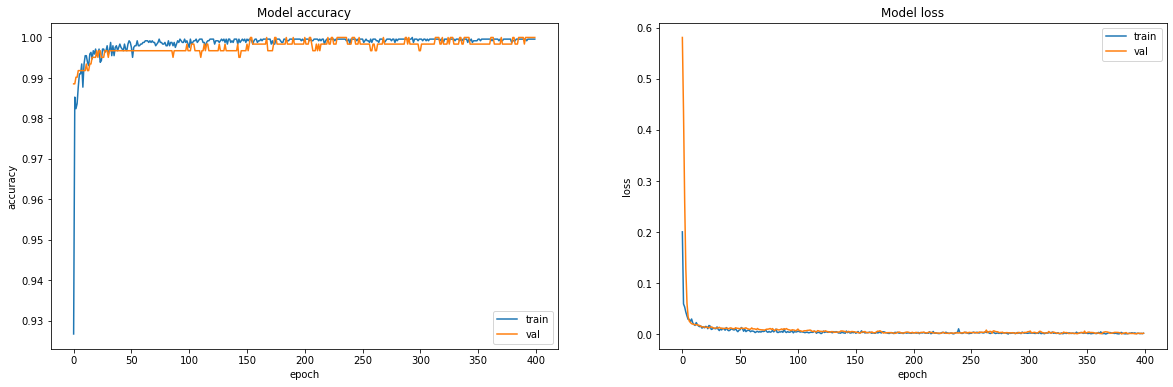

In [178]:
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

In [189]:
preds = model.predict_classes(X_test).flatten()

In [180]:
tst = y_test.flatten()

In [181]:
((preds == tst) * 1).sum() / len(tst)

0.9962914485165794

In [182]:
lreg = LogisticRegression().fit(X_train, y_train.flatten())

In [183]:
lreg.score(X_test, y_test.flatten())

0.9971640488656196

In [184]:
rf = RandomForestClassifier(n_estimators=10, max_features=3, n_jobs=4)

In [187]:
rf.fit(X_train, y_train.flatten())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [188]:
rf.score(X_test, y_test.flatten())

0.9976003490401396

In [ ]:
plt.hist(model.predict(X_test), bins = 100)
plt.axvline(0.1)
plt.axvline(0.5)

In [ ]:
plt.hist(y_test)

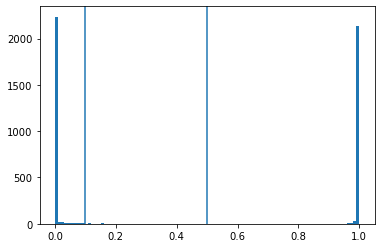

(array([2360.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2224.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

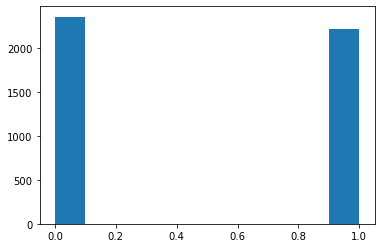

In [198]:
plt.hist(y_test)